<a href="https://colab.research.google.com/github/jarreed0/school_stuff/blob/main/starter_signs_v2_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Note: After you run this cell, the training and test data will be available in
# the file browser. (Click the folder icon on the left to view it)
#
# If you don't see the data after the cell completes, click the refresh button
# in the file browser (folder icon with circular arrow)

# First, let's download and unzip the data
!echo "Downloading files..."
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training1.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training2.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_classes.csv

!echo "Unzipping files..."
!unzip -q /content/training1.zip
!unzip -q /content/training2.zip
!unzip -q /content/test.zip

# Combine the two traning directories
!echo "Merging training data..."
!mkdir /content/training
!mv /content/training1/* /content/training
!mv /content/training2/* /content/training

# Cleanup
!echo "Cleaning up..."
!rmdir /content/training1
!rmdir /content/training2
!rm training1.zip
!rm training2.zip
!rm test.zip

!echo "Data ready."

Unzipping files...
Merging training data...
Cleaning up...
Data ready.


In [4]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import datasets, layers, models

In [6]:
# We're using keras' ImageDataGenerator class to load our image data.
# See (https://keras.io/api/preprocessing/image/#imagedatagenerator-class) for details
#
# A couple of things to note:
# 1. We're specifying a number for the seed, so we'll always get the same shuffle and split of our images.
# 2. Class names are inferred automatically from the image subdirectory names.
# 3. We're splitting the training data into 80% training, 20% validation. 

training_dir = '/content/training/'
img_sz = (100, 100)

# Split up the training data images into training and validations sets
# We'll use and ImageDataGenerator to do the splits
# ImageDataGenerator can also be used to do preprocessing and agumentation on the files as can be seen with rescale

#train_datagen = ImageDataGenerator(
#        rescale=1./255,
#        validation_split=.2
#        )
#validation_datagen = ImageDataGenerator(
#        rescale=1./255,
#        validation_split=.2
#        )

#train_generator = train_datagen.flow_from_directory(
#        training_dir,
#        target_size = image_size,
#        subset="training",
#        batch_size=32,
#        class_mode='sparse',
#        seed=42,shuffle=True)

train_gen = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  #rescale=1./255,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=img_sz,
  batch_size=32)

#validation_generator = validation_datagen.flow_from_directory(
#        training_dir,
#        target_size=image_size,
#        batch_size=32,
#        class_mode='sparse',
#        subset="validation",
#        seed=42)

val_gen = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=img_sz,
  batch_size=32)


Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [7]:
class_names = train_gen.class_names
print(class_names)

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042']


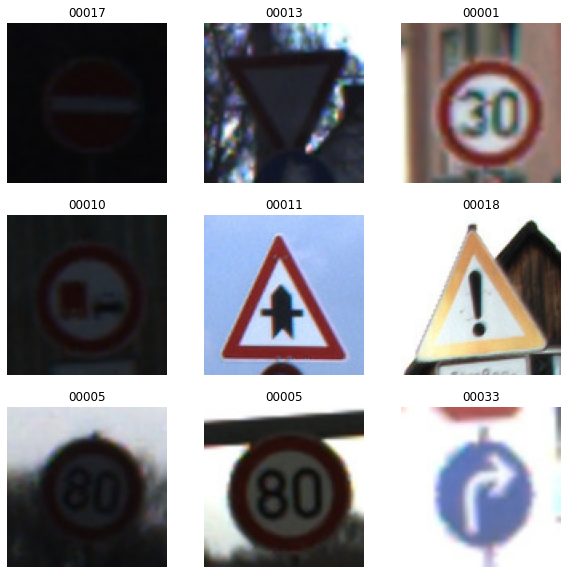

In [9]:
# View 9 images and their class labels
#plt.figure(figsize=(10, 10))
#for images, labels in train_generator:
#    for i in range(9):
#        first_image = images.tolist()[i]      
#        ax = plt.subplot(3, 3, i + 1)
#        f = np.array(first_image)*255
#        plt.imshow(f.astype("uint8"))
#        plt.title(int(labels[i]))
#        plt.axis("off")
#    break

plt.figure(figsize=(10, 10))
for images, labels in train_gen.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

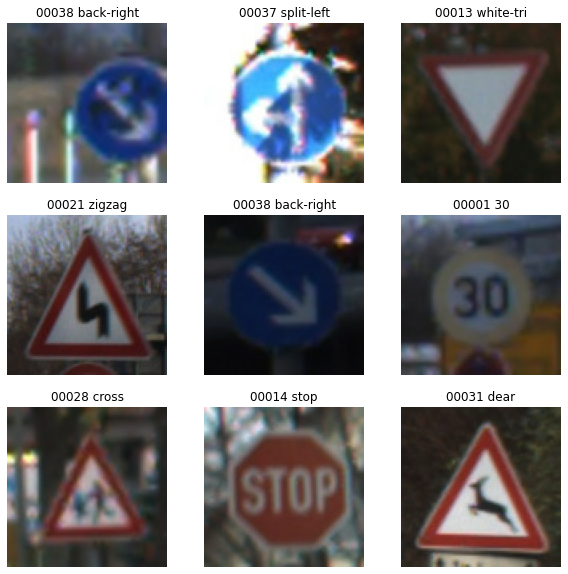

In [52]:
signs = ['20', '30', '50', '60', '70', '80', 'x80', '100', '120', '2 cars', 'car & truck', 'up', 'yellow', 'white-tri', 'stop', 'wh-circle', 'truck', 'no-entry', '!', 'left', 'right', 'zigzag', 'bumb', 'wet', 'close-lane', 'work', 'signal', 'ped', 'cross', 'bike', 'snow', 'dear', 'end', 'right-blue', 'left-blue', 'up-blue', 'split-right', 'split-left', 'back-right', 'back-left', 'roundabout', 'end-2-lanes', 'end-car-truck-lane']


plt.figure(figsize=(10, 10))
for images, labels in train_gen.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]] + " " + signs[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_gen:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_gen = train_gen.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_gen = val_gen.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.Rescaling(1./255)

normalized_signs = train_gen.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_signs))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.043137256 1.0


In [13]:
# Build a model...

#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10))



num_classes = len(class_names)

model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_sz[0], img_sz[1], 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])




In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


#history = model.fit(train_images, train_labels, epochs=10, 
 #                   validation_data=(test_images, test_labels))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

In [15]:
epochs=200
history = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=epochs
)

Epoch 1/100
981/981 [==============================] - 49s 20ms/step - loss: 0.7903 - accuracy: 0.7741 - val_loss: 0.1337 - val_accuracy: 0.9605
Epoch 2/100
981/981 [==============================] - 16s 16ms/step - loss: 0.0803 - accuracy: 0.9775 - val_loss: 0.1196 - val_accuracy: 0.9661
Epoch 3/100
981/981 [==============================] - 16s 16ms/step - loss: 0.0387 - accuracy: 0.9897 - val_loss: 0.0733 - val_accuracy: 0.9795
Epoch 4/100
981/981 [==============================] - 16s 16ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0520 - val_accuracy: 0.9861
Epoch 5/100
981/981 [==============================] - 16s 16ms/step - loss: 0.0232 - accuracy: 0.9935 - val_loss: 0.0689 - val_accuracy: 0.9816
Epoch 6/100
981/981 [==============================] - 16s 16ms/step - loss: 0.0172 - accuracy: 0.9956 - val_loss: 0.0638 - val_accuracy: 0.9856
Epoch 7/100
981/981 [==============================] - 16s 16ms/step - loss: 0.0151 - accuracy: 0.9957 - val_loss: 0.0379 - val_ac

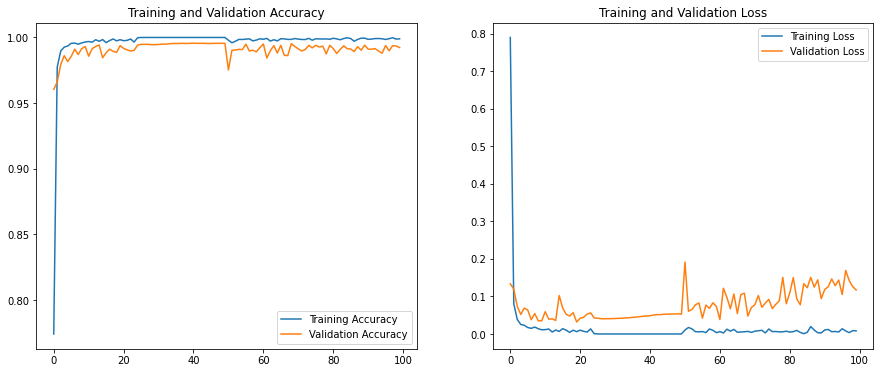

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

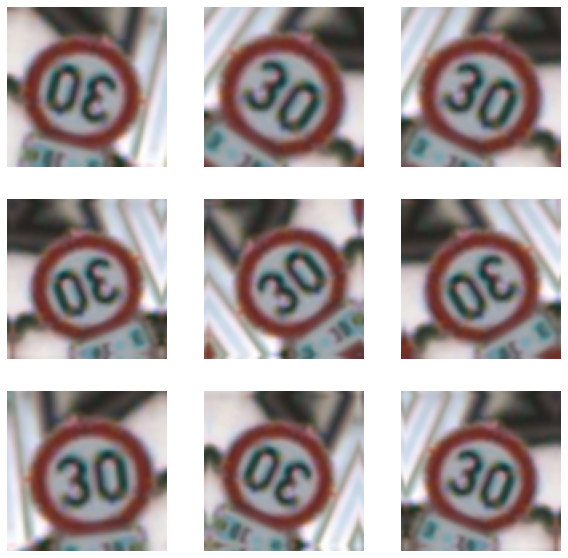

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_sz[0],
                                  img_sz[1],
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_gen.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [28]:
model2 = models.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [29]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                  

In [35]:
epochs = 200
history2 = model2.fit(
  train_gen,
  validation_data=val_gen,
  epochs=epochs
)

Epoch 1/100
981/981 [==============================] - 20s 20ms/step - loss: 0.0960 - accuracy: 0.9700 - val_loss: 0.0853 - val_accuracy: 0.9733
Epoch 2/100
981/981 [==============================] - 20s 20ms/step - loss: 0.0924 - accuracy: 0.9702 - val_loss: 0.0583 - val_accuracy: 0.9813
Epoch 3/100
981/981 [==============================] - 19s 20ms/step - loss: 0.0841 - accuracy: 0.9723 - val_loss: 0.0665 - val_accuracy: 0.9828
Epoch 4/100
981/981 [==============================] - 20s 20ms/step - loss: 0.0844 - accuracy: 0.9727 - val_loss: 0.0593 - val_accuracy: 0.9824
Epoch 5/100
981/981 [==============================] - 19s 20ms/step - loss: 0.0853 - accuracy: 0.9727 - val_loss: 0.0905 - val_accuracy: 0.9699
Epoch 6/100
981/981 [==============================] - 19s 20ms/step - loss: 0.0760 - accuracy: 0.9760 - val_loss: 0.0556 - val_accuracy: 0.9846
Epoch 7/100
981/981 [==============================] - 20s 20ms/step - loss: 0.0726 - accuracy: 0.9762 - val_loss: 0.0712 - val_ac

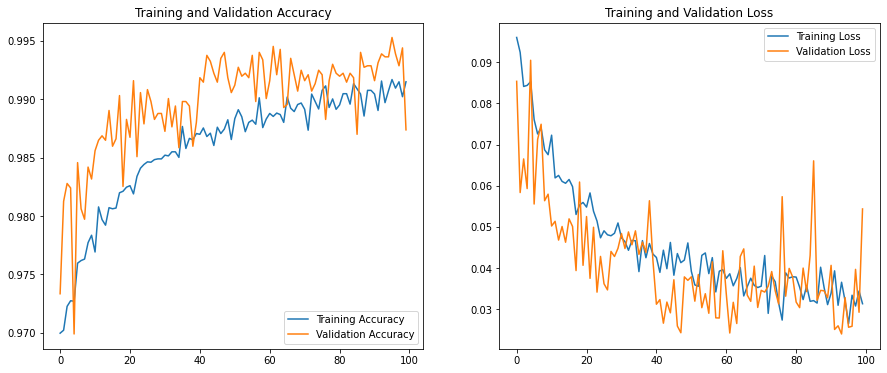

In [37]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test'],
        target_size=img_sz,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]

print(predictions)

Found 12630 images belonging to 1 classes.
[29, 1, 29, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 13, 29, 29, 4, 29, 29, 29, 29, 29, 29, 29, 13, 29, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 4, 29, 29, 13, 29, 29, 29, 29, 29, 29, 29, 29, 29, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 1, 1, 29, 29, 29, 29, 29, 29, 29, 1, 29, 29, 29, 13, 1, 29, 29, 13, 29, 1, 29, 29, 29, 29, 29, 29, 29, 1, 29, 29, 29, 29, 29, 1, 29, 29, 29, 29, 29, 13, 29, 29, 29, 29, 29, 29, 29, 1, 4, 13, 29, 29, 29, 29, 29, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 1, 29, 4, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 4, 29, 29, 29, 1, 29, 29, 29, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 4, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 

In [47]:
probabilities2 = model2.predict(test_generator)
predictions2 = [np.argmax(probas) for probas in probabilities2]

print(predictions2)

[13, 33, 13, 33, 13, 13, 33, 13, 33, 13, 33, 13, 13, 13, 13, 13, 13, 13, 33, 33, 13, 33, 13, 13, 13, 33, 13, 13, 13, 33, 13, 13, 18, 13, 13, 13, 33, 13, 33, 13, 13, 13, 33, 13, 13, 13, 13, 13, 13, 13, 13, 13, 33, 13, 13, 33, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 33, 33, 33, 13, 13, 33, 13, 13, 13, 13, 13, 13, 13, 33, 13, 33, 13, 13, 13, 33, 13, 13, 13, 13, 13, 13, 13, 33, 33, 13, 33, 33, 33, 13, 13, 13, 33, 13, 13, 13, 33, 13, 13, 13, 13, 13, 13, 33, 13, 33, 13, 13, 33, 13, 33, 13, 13, 13, 13, 13, 13, 13, 33, 33, 13, 13, 33, 13, 13, 13, 13, 13, 33, 33, 33, 13, 33, 13, 33, 33, 13, 13, 33, 13, 13, 13, 13, 33, 13, 13, 13, 13, 33, 33, 13, 13, 13, 13, 33, 33, 13, 13, 13, 13, 33, 33, 33, 33, 33, 13, 13, 13, 13, 33, 33, 33, 13, 33, 13, 33, 13, 13, 13, 33, 13, 33, 13, 33, 33, 33, 13, 33, 13, 13, 13, 13, 13, 13, 13, 13, 13, 33, 13, 13, 13, 33, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 33, 33, 33, 13, 33, 13, 13, 13, 13, 13, 33, 33, 13, 13, 13, 33, 13, 13, 13, 13,

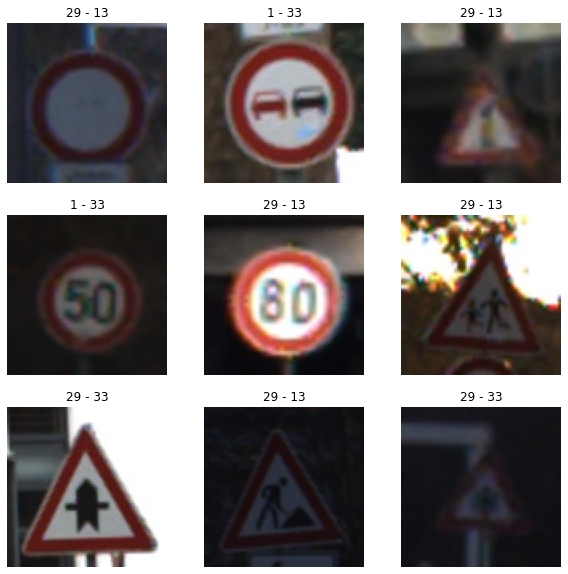

In [50]:
plt.figure(figsize=(10, 10))
for images, labels in test_generator:
    for i in range(9):
        first_image = images.tolist()[i]      
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(str(int(predictions[i])) + " - " + str(int(predictions2[i])))
        plt.axis("off")
    break

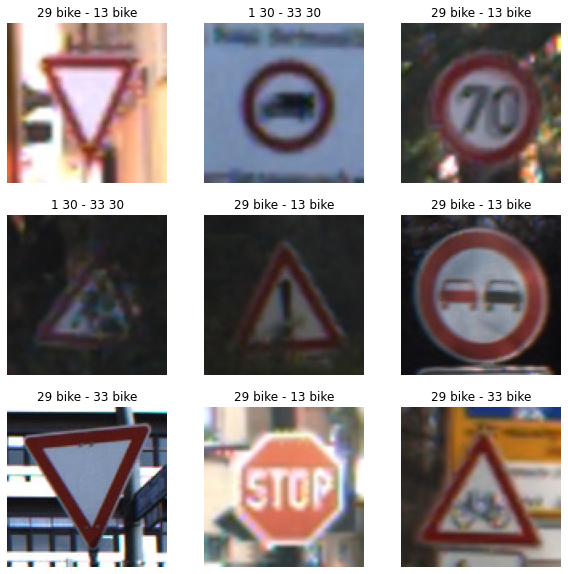

In [55]:
plt.figure(figsize=(10, 10))
for images, labels in test_generator:
    for i in range(9):
        first_image = images.tolist()[i]      
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(str(int(predictions[i])) + " " + signs[predictions[i]] + " - " + str(int(predictions2[i])) + " " + signs[predictions[i]])
        plt.axis("off")
    break

## Testing the model
Once you have built and trained your model, the next step is to run the test images through it and see how well your model does at making predictions for images it has never seen before. 

Since loading these images and formatting them for the model can be tricky, you may find the following code useful. This code only uses your model to predict the class label for a given image. You'll still need to compare those predictions to the "ground truth" class labels in `test_classes.csv` to evaluate how well the model does.



```
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]
```



##Hold out Dataset
For the previous modules, your team has turned in your predictions for us to evalutate. This time, you're given the answers to the hold out dataset and will need to perform your own evaluation. 

Once you have predictions, you'll need to compare those predictions against the "ground truth" class labels in `test_classes.csv` to evaluate how well the model does. 

Make sure to use the insights gained from the hold out dataset in your executive summary.